In [1]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim
#import ggplot
import seaborn as sns
import spacy
import logging
import warnings
import json
import logging
import os
import pyLDAvis.gensim
import matplotlib as mpl
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle
from collections import Counter
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from spacy.lang.en import English

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\PythonInstall\lib\site-packages\bokeh\plotting\helpers.py:21: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, OrderedDict, Sequence
C:\PythonInstall\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""


In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

import matplotlib.colors as mcolors
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from spacy.lang.en import English

In [3]:
# Import Dataset
df1 = pd.read_json("Mckinsey_Articles.json")
print(df1.shape)
df1.head()

(215, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
2,,,https://healthcare.mckinsey.com/,,,
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...


In [4]:
df2=df1[df1['body'] != "NaN"]
print(df2.shape)
df2.head()

(215, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
2,,,https://healthcare.mckinsey.com/,,,
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...


In [5]:
df=df1[df1['body'] != ""]
print(df.shape)
df.head(215)

(194, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...
5,December 2019,Article,https://www.mckinsey.com/industries/healthcare...,Zahy Abou-Atme,enrollment in provider-led health plans (PLHP...,\r\n\t\t\t\t\t\tHow should provider-led health...
6,October 2019,Interview,https://www.mckinsey.com/industries/healthcare...,Erica Coe,"Michael, it’s great to be speaking with you t...",\r\n\t\t\t\t\t\tWhy social determinants matter...
7,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,is a senior partner in McKinsey’s London offi...,\r\n\t\t\t\t\t\tFit for the future: The common...
8,November 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"In 2017, total healthcare spending accounted f...",\r\n\t\t\t\t\t\tGetting the right care to the ...
9,November 2019,Article,https://www.mckinsey.com/industries/public-sec...,Naufal Khan,are the enabling technology behind state-leve...,\r\n\t\t\t\t\t\tInsights into better integrate...
11,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Today, I’m joined by Dr. Jim Weinstein, who i...",\r\n\t\t\t\t\t\tPicking winning strategies to ...


In [6]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.body.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])
# [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

[['healthcare', 'is', 'an', 'essential', 'dynamic', 'and', 'opportunity', 'rich', 'industry', 'the', 'demand', 'for', 'innovation', 'to', 'drive', 'simultaneous', 'improvement', 'in', 'health', 'outcomes', 'affordability', 'quality', 'and', 'access', 'will', 'continue', 'to', 'be', 'high', 'as', 'we', 'look', 'ahead', 'we', 'suggest', 'keeping', 'an', 'eye', 'on', 'the', 'following', 'seven', 'trends', 'multiple', 'forces', 'including', 'the', 'mitigation', 'of', 'additional', 'funding', 'from', 'the', 'affordable', 'care', 'act', 'are', 'combining', 'to', 'form', 'headwinds', 'against', 'profit', 'pool', 'growth', 'in', 'healthcare', 'new', 'business', 'models', 'that', 'create', 'significant', 'healthcare', 'value', 'that', 'is', 'substantially', 'better', 'cost', 'quality', 'and', 'outcomes', 'will', 'be', 'critical', 'and', 'are', 'emerging', 'for', 'example', 'payers', 'reimagining', 'the', 'next', 'generation', 'managed', 'care', 'model', 'with', 'meaningful', 'engagement', 'in',

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

from spacy.lang.en import English

#!python -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [8]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.024*"lean" + 0.016*"people" + 0.013*"time" + 0.012*"work" + '
  '0.012*"company" + 0.009*"leadership" + 0.008*"woman" + 0.008*"customer" + '
  '0.007*"look" + 0.007*"year"'),
 (1,
  '0.021*"plan" + 0.013*"consumer" + 0.013*"market" + 0.011*"contract" + '
  '0.011*"year" + 0.010*"network" + 0.010*"exhibit" + 0.009*"state" + '
  '0.009*"performance" + 0.009*"rating"'),
 (2,
  '0.012*"value" + 0.011*"company" + 0.009*"new" + 0.009*"service" + '
  '0.009*"healthcare" + 0.008*"health" + 0.006*"provider" + 0.006*"system" + '
  '0.006*"example" + 0.006*"datum"'),
 (3,
  '0.045*"care" + 0.036*"patient" + 0.026*"health" + 0.022*"system" + '
  '0.022*"hospital" + 0.015*"provider" + 0.012*"clinical" + 0.010*"case" + '
  '0.008*"quality" + 0.008*"cost"')]


In [9]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7118,"value, company, new, service, healthcare, heal...","[essential, dynamic, opportunity, rich, indust..."
1,1,3.0,0.5006,"care, patient, health, system, hospital, provi...","[possible, cheaply, quickly, sequence, genome,..."
2,2,2.0,0.8075,"value, company, new, service, healthcare, heal...","[today, join, manage, director, capital, inves..."
3,3,3.0,0.4777,"care, patient, health, system, hospital, provi...","[much, join, today, hope, focus, role, base, s..."
4,4,1.0,0.5113,"plan, consumer, market, contract, year, networ...","[enrollment, provider, lead, health, plan, plh..."
5,5,3.0,0.5890,"care, patient, health, system, hospital, provi...","[speak, today, critical, topic, give, percent,..."
6,6,1.0,0.8383,"plan, consumer, market, contract, year, networ...","[member, mckinsey, publishing, base]"
7,7,0.0,0.4682,"lean, people, time, work, company, leadership,...","[total, healthcare, spending, account, percent..."
8,8,2.0,0.8005,"value, company, new, service, healthcare, heal...","[enable, technology, state, level, service, pr..."
9,9,3.0,0.4090,"care, patient, health, system, hospital, provi...","[today, join, serve, system, discuss, perspect..."


In [10]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.6658,"lean, people, time, work, company, leadership, woman, customer, look, year","[send, letter, employee, diversity, strength, work, closely, team, build, set, process, follow, ..."
1,1.0,0.9986,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[release, star_rating, give, multiple, source, volatility, market, include, recent, election, re..."
2,2.0,0.9994,"value, company, new, service, healthcare, health, provider, system, example, datum","[ambitious, vision, digitization, transform, core, business, service, industry, vision, typicall..."
3,3.0,0.9526,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[base, responsible, hospital, include, nationally, rank, nearly, health, center, clinic, follow,..."


In [11]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

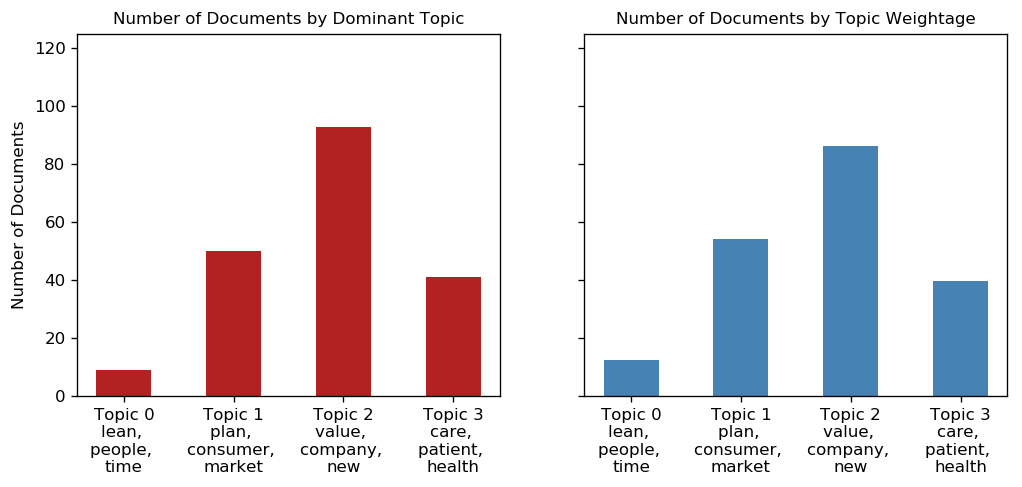

In [12]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 125)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [13]:
df_dominant_topic['Year']= df1['Article_date']
df_dominant_topic.sort_values(by=['Year'],inplace=True, ascending=True)
df_dominant_topic['Year'] =  pd.to_datetime(df_dominant_topic['Year'], format='%B %Y', errors='coerce').dt.year
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Year
18,18,2.0,0.3565,"value, company, new, service, healthcare, health, provider, system, example, datum","[hospital, system, patient, satisfaction, likely, become, increasingly, important, source, provi...",NaN
10,10,1.0,0.6279,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[fall, eligible, table, log, computer, annual, ritual, selecting, receive, benefit, consumer, mu...",NaN
2,2,2.0,0.8075,"value, company, new, service, healthcare, health, provider, system, example, datum","[today, join, manage, director, capital, invest, firm, delight, speak, give, wealth, knowledge, ...",NaN
17,17,1.0,0.5824,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[people, age, chance, stay, put, health, plan, least, accord, annual, survey, senior, consumer, ...",NaN
119,119,2.0,0.9820,"value, company, new, service, healthcare, health, provider, system, example, datum","[growth, major, change, strong, value_creation, potential, healthcare, exciting, industry, time,...",2009.0
146,146,3.0,0.4466,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[diagnostic, pre, non, healthcare, professional, account, almost, percent, project, profit_pool,...",2014.0
89,89,3.0,0.5052,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[die, year, world, complication, arise, pregnancy, majority, death, occur, largely, preventable,...",2016.0
87,87,3.0,0.5281,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[delivery, health, care, particularly, develop, country, offer, insight, tackle, rise, cost, est...",2017.0
50,50,2.0,0.5232,"value, company, new, service, healthcare, health, provider, system, example, datum","[person, work, retail, industry, productivity, low, several, barrier, prevent, efficient, boost,...",2017.0
49,49,2.0,0.6037,"value, company, new, service, healthcare, health, provider, system, example, datum","[company, rarely, compete, price, require, consumer, amass, substantial, saving, afford, single,...",2017.0


In [14]:
df_dominant_topic2=df_dominant_topic[['Year', 'Dominant_Topic']]
df_dominant_topic2

,Year,Dominant_Topic
18,NaN,2.0
10,NaN,1.0
2,NaN,2.0
17,NaN,1.0
119,2009.0,2.0
146,2014.0,3.0
89,2016.0,3.0
87,2017.0,3.0
50,2017.0,2.0
49,2017.0,2.0


In [15]:
df_dominant_topic3=df_dominant_topic2.drop([18, 10, 2, 17])
df_dominant_topic3

,Year,Dominant_Topic
119,2009.0,2.0
146,2014.0,3.0
89,2016.0,3.0
87,2017.0,3.0
50,2017.0,2.0
49,2017.0,2.0
137,2018.0,1.0
139,2018.0,1.0
145,2019.0,1.0
140,2019.0,1.0


In [16]:
df2017=df_dominant_topic3[df_dominant_topic3['Year']==(2017.0)]
df2017

,Year,Dominant_Topic
87,2017.0,3.0
50,2017.0,2.0
49,2017.0,2.0
163,2017.0,2.0
165,2017.0,3.0
130,2017.0,2.0
133,2017.0,3.0
131,2017.0,2.0
132,2017.0,0.0
54,2017.0,0.0


In [17]:
dominant_topic_in_each_doc = df2017.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

In [18]:
df_dominant_topic_in_each_doc

,Dominant_Topic,count
0,0.0,3
1,1.0,8
2,2.0,20
3,3.0,6


In [19]:
dominant_topic_in_each_doc2 = df_dominant_topic3.groupby(['Year', 'Dominant_Topic']).size()
df_dominant_topic_in_each_doc2 = dominant_topic_in_each_doc2.to_frame(name='count').reset_index()

In [20]:
df_dominant_topic_in_each_doc2

,Year,Dominant_Topic,count
0,2000.0,2.0,5
1,2001.0,2.0,1
2,2006.0,2.0,1
3,2007.0,2.0,1
4,2008.0,1.0,1
5,2009.0,2.0,3
6,2009.0,3.0,1
7,2010.0,1.0,1
8,2010.0,2.0,5
9,2010.0,3.0,3


[Text(0, 0.5, 'Number of Documents'), Text(0.5, 0, 'Year')]

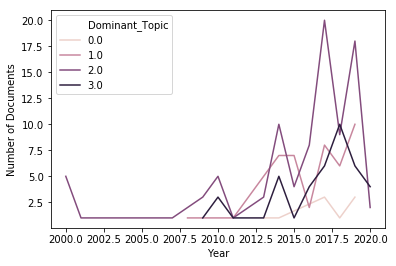

In [21]:
plot=sns.lineplot(data=df_dominant_topic_in_each_doc2, x='Year', y='count', hue='Dominant_Topic')
plot.set(xlabel='Year', ylabel='Number of Documents')

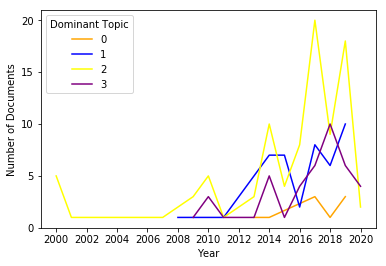

In [44]:
custom_palette=["orange", "blue", "yellow", "purple"]
sns.set_palette(custom_pallete)


plot=sns.lineplot(data=df_dominant_topic_in_each_doc2, x='Year', y='count', hue='Dominant_Topic', palette=custom_pallete, legend=False)
plot.set(xlabel='Year', ylabel='Number of Documents')
plt.setp(plot, yticks=[0, 5, 10, 15, 20])
plt.setp(plot, xticks=[2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])

plt.legend(title='Dominant Topic', loc='upper left', labels=['0', '1', '2', '3'])
plt.show(plot)